# Import package library and global parameter settings

In [1]:
import os
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn import model_selection   
from sklearn.metrics import confusion_matrix   
from sklearn.metrics import accuracy_score  
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import r2_score  

In [3]:
plt.rcParams['font.sans-serif'] = ['Times New Roman']
plt.rcParams['axes.unicode_minus'] = False

In [4]:
dir_open = r'D:\DoctoralThesis\CorrForScattAna'
dir_write = dir_open

In [5]:
from sklearn.svm import SVR
from sklearn.model_selection import KFold, train_test_split, GridSearchCV

# 1 Reading in parameters and setting them

In [6]:
if __name__ == '__main__':
    GDCalCDOM = pd.read_excel(os.path.join(dir_open,"CDOM(88Points)MachineLearningModelCalibration.xlsx"),index_col ='Wavelength')
    GDValCDOM = pd.read_excel(os.path.join(dir_open,"CDOM(88Points)MachineLearningModelValidation.xlsx"),index_col ='Wavelength')
    lenSelectedBandNumCDOM = len(GDCalCDOM.columns)-1
    lenCalSampPointsNumCDOM = len(GDCalCDOM.index)
    lenValSampPointsNumCDOM = len(GDValCDOM.index)
    
    cal_data_inputs_CDOM = np.array(GDCalCDOM.iloc[:,0:lenSelectedBandNumCDOM]).reshape(lenCalSampPointsNumCDOM,lenSelectedBandNumCDOM) 
    val_data_inputs_CDOM = np.array(GDValCDOM.iloc[:,0:lenSelectedBandNumCDOM]).reshape(lenValSampPointsNumCDOM,lenSelectedBandNumCDOM)
    cal_data_outputs_CDOM = np.array(GDCalCDOM['CDOM']).reshape(lenCalSampPointsNumCDOM,1)
    val_data_outputs_CDOM = np.array(GDValCDOM['CDOM']).reshape(lenValSampPointsNumCDOM,1)
        
    SVR_params_CDOM = {'C': 9.97,'kernel': 'rbf','epsilon': 0.09,'gamma': 0.65,'tol': 1e-3}  
    regCDOM = SVR(**SVR_params_CDOM)       

# GridSearchCV

In [833]:
    cv_params = {'degree': np.linspace(1,10,10)}

    other_params = {'kernel': 'poly'}

    model = SVR(**other_params)  
    
    optimized_GBM = GridSearchCV(estimator=model, param_grid=cv_params, scoring='neg_mean_absolute_error', refit = True, cv=5, verbose=1, n_jobs=4)
    optimized_GBM.fit(cal_data_inputs_CDOM, cal_data_outputs_CDOM)

    evalute_result = optimized_GBM.cv_results_
    
    evalute_params = optimized_GBM.cv_results_['params'] 
    
    print('每轮迭代运行结果:{0}'.format(evalute_result))
    print('参数的最佳取值：{0}'.format(optimized_GBM.best_params_))
    print('最佳模型得分:{0}'.format(optimized_GBM.best_score_))

Fitting 5 folds for each of 10 candidates, totalling 50 fits
每轮迭代运行结果:{'mean_fit_time': array([0.00079761, 0.0011961 , 0.00059934, 0.00059876, 0.00099745,
       0.00099783, 0.00059834, 0.00079813, 0.00119557, 0.00119686]), 'std_fit_time': array([7.46059921e-04, 9.77390356e-04, 7.98738484e-04, 4.88889156e-04,
       6.30977274e-04, 1.36044909e-06, 4.88539033e-04, 3.99065887e-04,
       9.77595182e-04, 4.00067058e-04]), 'mean_score_time': array([0.0007978 , 0.00020027, 0.00039897, 0.00039811, 0.00039902,
       0.00019908, 0.        , 0.00019946, 0.00019975, 0.00019979]), 'std_score_time': array([0.0003989 , 0.00040054, 0.00048864, 0.00048758, 0.00048869,
       0.00039816, 0.        , 0.00039892, 0.00039949, 0.00039959]), 'param_degree': masked_array(data=[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0],
             mask=[False, False, False, False, False, False, False, False,
                   False, False],
       fill_value='?',
            dtype=object), 'params': [{'degree': 

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished


In [874]:
    cv_params = {'C': np.linspace(0.01,10,999)}

    other_params = {'kernel': 'rbf'}

    model = SVR(**other_params)  
    
    optimized_GBM = GridSearchCV(estimator=model, param_grid=cv_params, scoring='neg_mean_absolute_error', refit = True, cv=5, verbose=1, n_jobs=4)
    optimized_GBM.fit(cal_data_inputs_CDOM, cal_data_outputs_CDOM)

    evalute_result = optimized_GBM.cv_results_
    evalute_params = optimized_GBM.cv_results_['params'] 
    
    print('每轮迭代运行结果:{0}'.format(evalute_result))
    print('参数的最佳取值：{0}'.format(optimized_GBM.best_params_))
    print('最佳模型得分:{0}'.format(optimized_GBM.best_score_))

Fitting 5 folds for each of 999 candidates, totalling 4995 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done 312 tasks      | elapsed:    0.2s


每轮迭代运行结果:{'mean_fit_time': array([0.0008028 , 0.00079789, 0.00059838, 0.00079851, 0.00099759,
       0.00039878, 0.00099587, 0.00079837, 0.00119114, 0.        ,
       0.00019956, 0.0009974 , 0.00099697, 0.00099754, 0.00119853,
       0.00239539, 0.00139909, 0.0015954 , 0.00119815, 0.00139542,
       0.00019913, 0.00159478, 0.00119629, 0.00079794, 0.00119424,
       0.00019927, 0.00079794, 0.00119314, 0.        , 0.00039902,
       0.00099149, 0.00039873, 0.00079823, 0.00079737, 0.00059876,
       0.0001996 , 0.00059905, 0.00079732, 0.000598  , 0.00079947,
       0.00079832, 0.00019956, 0.0004004 , 0.00079775, 0.00060015,
       0.00039887, 0.00099707, 0.00060005, 0.00059829, 0.00039892,
       0.0003922 , 0.00059872, 0.00079718, 0.00039864, 0.00039887,
       0.00099726, 0.00059834, 0.00079808, 0.00059819, 0.00079823,
       0.001197  , 0.0005981 , 0.00099716, 0.00099702, 0.0003993 ,
       0.00079799, 0.00099711, 0.00039687, 0.00119753, 0.00039854,
       0.00059876, 0.00099726, 0.00

[Parallel(n_jobs=4)]: Done 4995 out of 4995 | elapsed:    1.7s finished


In [880]:
    cv_params = {'epsilon': np.linspace(0.01,0.2,20)}

    other_params = {'C': 9.97,'kernel': 'rbf'}

    model = SVR(**other_params)  
    
    optimized_GBM = GridSearchCV(estimator=model, param_grid=cv_params, scoring='neg_mean_absolute_error', refit = True, cv=5, verbose=1, n_jobs=4)
    optimized_GBM.fit(cal_data_inputs_CDOM, cal_data_outputs_CDOM)

    evalute_result = optimized_GBM.cv_results_
    evalute_params = optimized_GBM.cv_results_['params'] 
    
    print('每轮迭代运行结果:{0}'.format(evalute_result))
    print('参数的最佳取值：{0}'.format(optimized_GBM.best_params_))
    print('最佳模型得分:{0}'.format(optimized_GBM.best_score_))

Fitting 5 folds for each of 20 candidates, totalling 100 fits
每轮迭代运行结果:{'mean_fit_time': array([0.00079789, 0.0008008 , 0.00040116, 0.00099673, 0.00059762,
       0.00039902, 0.0009975 , 0.00039897, 0.00079784, 0.00059919,
       0.000598  , 0.00079794, 0.00099792, 0.00099697, 0.00099726,
       0.0011991 , 0.00139937, 0.00099745, 0.00119967, 0.00119543]), 'std_fit_time': array([3.98947529e-04, 4.00423486e-04, 4.91338700e-04, 6.28344041e-04,
       4.87955099e-04, 4.88694457e-04, 1.26161521e-03, 4.88636504e-04,
       3.98922992e-04, 4.89240278e-04, 4.88266265e-04, 3.98972970e-04,
       1.19304619e-06, 1.11420836e-06, 1.26142663e-03, 3.97546308e-04,
       4.92349885e-04, 6.35164110e-04, 4.04858656e-04, 3.98998347e-04]), 'mean_score_time': array([0.00019937, 0.00059595, 0.00079541, 0.0004005 , 0.        ,
       0.        , 0.00039887, 0.00099702, 0.00019917, 0.00059829,
       0.00039859, 0.00020413, 0.00019951, 0.        , 0.00059838,
       0.00039663, 0.00019693, 0.00059614, 0.000

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished


In [886]:
    cv_params = {'gamma': np.linspace(0.001,1,999)} 

    other_params = {'C': 9.97,'kernel': 'rbf','epsilon': 0.09}

    model = SVR(**other_params)  
   
    optimized_GBM = GridSearchCV(estimator=model, param_grid=cv_params, scoring='neg_mean_absolute_error', refit = True, cv=5, verbose=1, n_jobs=4)
    optimized_GBM.fit(cal_data_inputs_CDOM, cal_data_outputs_CDOM)

    evalute_result = optimized_GBM.cv_results_
    evalute_params = optimized_GBM.cv_results_['params'] 
    
    print('每轮迭代运行结果:{0}'.format(evalute_result))
    print('参数的最佳取值：{0}'.format(optimized_GBM.best_params_))
    print('最佳模型得分:{0}'.format(optimized_GBM.best_score_))

Fitting 5 folds for each of 999 candidates, totalling 4995 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done 312 tasks      | elapsed:    0.2s


每轮迭代运行结果:{'mean_fit_time': array([0.00099626, 0.00019951, 0.00099778, 0.00100374, 0.00019913,
       0.0011992 , 0.00079608, 0.0003993 , 0.00079827, 0.00019965,
       0.00139804, 0.00079904, 0.0015955 , 0.00139651, 0.00159578,
       0.00099821, 0.00079784, 0.00039921, 0.00139356, 0.00159631,
       0.00099716, 0.00079818, 0.00099449, 0.00119681, 0.00099154,
       0.0003993 , 0.00119796, 0.00039845, 0.00099759, 0.00059819,
       0.0001996 , 0.00079904, 0.00079756, 0.00139685, 0.00059857,
       0.0001996 , 0.00079789, 0.00099716, 0.00039992, 0.00099669,
       0.00059829, 0.00079818, 0.00059838, 0.        , 0.00039825,
       0.00059829, 0.00079784, 0.00039892, 0.00079761, 0.00079813,
       0.00040555, 0.00039897, 0.00039878, 0.00019941, 0.00039911,
       0.00059843, 0.00060515, 0.00059829, 0.        , 0.00059857,
       0.00019932, 0.00039897, 0.00079818, 0.        , 0.0009975 ,
       0.00059838, 0.00039892, 0.00039897, 0.00119691, 0.00119653,
       0.00039887, 0.00059876, 0.00

[Parallel(n_jobs=4)]: Done 4995 out of 4995 | elapsed:    1.7s finished


In [892]:
    cv_params = {'tol': np.linspace(0.0001,1,9999)} 

    other_params = {'C': 9.97,'kernel': 'rbf','epsilon': 0.09,'gamma': 0.65}

    model = SVR(**other_params)  
   
    optimized_GBM = GridSearchCV(estimator=model, param_grid=cv_params, scoring='neg_mean_absolute_error', refit = True, cv=5, verbose=1, n_jobs=4)
    optimized_GBM.fit(cal_data_inputs_CDOM, cal_data_outputs_CDOM)

    evalute_result = optimized_GBM.cv_results_
    evalute_params = optimized_GBM.cv_results_['params'] 
    
    print('每轮迭代运行结果:{0}'.format(evalute_result))
    print('参数的最佳取值：{0}'.format(optimized_GBM.best_params_))
    print('最佳模型得分:{0}'.format(optimized_GBM.best_score_))

Fitting 5 folds for each of 9999 candidates, totalling 49995 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done 312 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 34808 tasks      | elapsed:    9.8s
[Parallel(n_jobs=4)]: Done 49995 out of 49995 | elapsed:   13.7s finished


每轮迭代运行结果:{'mean_fit_time': array([0.0005939 , 0.00059838, 0.00039973, ..., 0.00039887, 0.00059862,
       0.00019946]), 'std_fit_time': array([0.00048499, 0.00048858, 0.00048958, ..., 0.00048852, 0.00048877,
       0.00039892]), 'mean_score_time': array([0.00039916, 0.        , 0.00060143, ..., 0.00059829, 0.00019937,
       0.00019946]), 'std_score_time': array([0.00048887, 0.        , 0.0004911 , ..., 0.0004885 , 0.00039873,
       0.00039892]), 'param_tol': masked_array(data=[0.0001, 0.0002000100020004001, 0.00030002000400080014,
                   ..., 0.9997999799959991, 0.9998999899979996, 1.0],
             mask=[False, False, False, ..., False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'tol': 0.0001}, {'tol': 0.0002000100020004001}, {'tol': 0.00030002000400080014}, {'tol': 0.00040003000600120025}, {'tol': 0.0005000400080016003}, {'tol': 0.0006000500100020004}, {'tol': 0.0007000600120024006}, {'tol': 0.0008000700140028006}, {'tol': 0.0009000800

# 2 Fit the model to the data set according to the parameters

In [7]:
SVRmodelCDOM = regCDOM.fit(cal_data_inputs_CDOM, cal_data_outputs_CDOM)

cal_data_outputs_pred_CDOM = SVRmodelCDOM.predict(cal_data_inputs_CDOM) 
val_data_outputs_pred_CDOM = SVRmodelCDOM.predict(val_data_inputs_CDOM)
print('cal_data_outputs_pred_CDOM:\n{0}'.format(cal_data_outputs_pred_CDOM)) 
print('val_data_outputs_pred_CDOM:\n{0}'.format(val_data_outputs_pred_CDOM)) 

print(SVRmodelCDOM.support_vectors_)   
print(SVRmodelCDOM.score(cal_data_inputs_CDOM, cal_data_outputs_CDOM))  
print(SVRmodelCDOM.score(val_data_inputs_CDOM, val_data_outputs_CDOM))  

cal_data_outputs_pred_CDOM:
[0.39182385 0.11140646 0.28305903 0.31841597 0.32362777 0.19932089
 0.32184969 0.30826197 0.21902096 0.2180131  0.25734648 0.29976626
 0.31133531 0.07305489 0.29828867 0.18761719 0.25702814 0.3748111
 0.34274117 0.21282423 0.37822796 0.54679171 0.1497893  0.21298576
 0.42671389 0.43815053 0.38891987 0.57777585 0.244255   0.65301605
 0.50800646 0.54783135 0.60968676 0.40115484 0.69743439 0.2192957
 0.4798709  0.38861573 0.30354169 0.48429856 0.28409574 0.63848035
 0.55662313 0.46844933 0.48232946 0.52765825 0.29747726 0.37920187
 0.37812039 0.51865955 0.51229402 0.45962407 0.58583232 0.69743418
 0.39110132 0.63685207 0.89465283 1.20833663 1.32000072]
val_data_outputs_pred_CDOM:
[0.21483207 0.35560013 0.16736692 0.33271664 0.34587059 0.06349701
 0.25849262 0.53819201 0.2761665  0.24514645 0.21126265 0.2977152
 0.40114517 0.42505697 0.41366807 0.66960422 0.32926214 0.39931316
 0.63230371 0.64206107 0.30118655 0.34614584 0.44104163 0.61404409
 0.58502527 0.59204

# 3 Data fitting and prediction effect evaluation

In [8]:
myCalR2_CDOM = r2_score(cal_data_outputs_CDOM,cal_data_outputs_pred_CDOM)
print('myCalR2_CDOM:\t{0}'.format(myCalR2_CDOM))
myValR2_CDOM = r2_score(val_data_outputs_CDOM,val_data_outputs_pred_CDOM)
print('myValR2_CDOM:\t{0}'.format(myValR2_CDOM))

myCalMSE_CDOM = mean_squared_error(cal_data_outputs_CDOM,cal_data_outputs_pred_CDOM)
print('myCalMSE_CDOM:\t{0}'.format(myCalMSE_CDOM)) 
myValMSE_CDOM = mean_squared_error(val_data_outputs_CDOM,val_data_outputs_pred_CDOM)
print('myValMSE_CDOM:\t{0}'.format(myValMSE_CDOM))

myCalRMSE_CDOM = np.sqrt(mean_squared_error(cal_data_outputs_CDOM,cal_data_outputs_pred_CDOM))
print('myCalRMSE_CDOM:\t{0}'.format(myCalRMSE_CDOM))
myValRMSE_CDOM = np.sqrt(mean_squared_error(val_data_outputs_CDOM,val_data_outputs_pred_CDOM))
print('myValRMSE_CDOM:\t{0}'.format(myValRMSE_CDOM)) 

myCalMAE_CDOM = mean_absolute_error(cal_data_outputs_CDOM,cal_data_outputs_pred_CDOM)
print('myCalMAE_CDOM:\t{0}'.format(myCalMAE_CDOM))
myValMAE_CDOM = mean_absolute_error(val_data_outputs_CDOM,val_data_outputs_pred_CDOM)
print('myValMAE_CDOM:\t{0}'.format(myValMAE_CDOM)) 

myCalRPD_CDOM = cal_data_outputs_CDOM.std()/myCalRMSE_CDOM
print('myCalRPD_CDOM:\t{0}'.format(myCalRPD_CDOM))
myValRPD_CDOM = val_data_outputs_CDOM.std()/myValRMSE_CDOM
print('myValRPD_CDOM:\t{0}'.format(myValRPD_CDOM))

myCalR2_CDOM:	0.555885358566016
myValR2_CDOM:	0.6354005791872099
myCalMSE_CDOM:	0.051839298114552915
myValMSE_CDOM:	0.04091094782951806
myCalRMSE_CDOM:	0.22768245016810784
myValRMSE_CDOM:	0.20226454911703648
myCalMAE_CDOM:	0.19450775556105324
myValMAE_CDOM:	0.1622391733997832
myCalRPD_CDOM:	1.5005568525114572
myValRPD_CDOM:	1.6561208041146611


In [9]:
from sklearn import linear_model

regrCalCDOM = linear_model.LinearRegression()

regrCalCDOM.fit(cal_data_outputs_CDOM.reshape(lenCalSampPointsNumCDOM,1),
                   np.array(cal_data_outputs_pred_CDOM).reshape(lenCalSampPointsNumCDOM,1))

regrValCDOM = linear_model.LinearRegression()
regrValCDOM.fit(val_data_outputs_CDOM.reshape(lenValSampPointsNumCDOM,1),
                   np.array(val_data_outputs_pred_CDOM).reshape(lenValSampPointsNumCDOM,1))

myCalK_CDOM = "%.2f" %regrCalCDOM.coef_    
myCalIntercept_CDOM = "%.2f" %regrCalCDOM.intercept_    
myValK_CDOM = "%.2f" %regrValCDOM.coef_    
myValIntercept_CDOM = "%.2f" %regrValCDOM.intercept_    

print('myCalK_CDOM:\t{0}'.format(myCalK_CDOM))
print('myValK_CDOM:\t{0}'.format(myValK_CDOM))
print('myCalIntercept_CDOM:\t{0}'.format(myCalIntercept_CDOM))
print('myValIntercept_CDOM:\t{0}'.format(myValIntercept_CDOM))

myCalK_CDOM:	0.50
myValK_CDOM:	0.63
myCalIntercept_CDOM:	0.21
myValIntercept_CDOM:	0.17


# 4 Fitting result scatter plot output

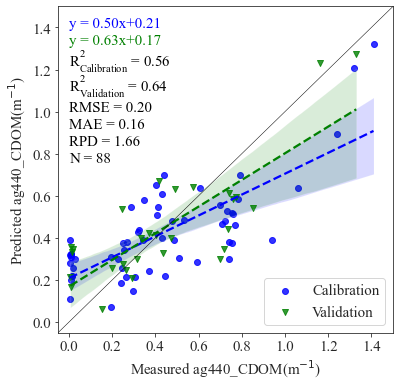

In [11]:
plt.figure(figsize=(6,6))
sns.set_style("ticks",{"xtick.major.size": 8, "ytick.major.size": 8}) 

sns.regplot(x=cal_data_outputs_CDOM,y=cal_data_outputs_pred_CDOM, marker= 'o',color='blue',scatter=True, fit_reg=True, 
            line_kws={'linestyle':'--','color':'blue'}, 
            label="Calibration",truncate=True,ci=95)
sns.regplot(x=val_data_outputs_CDOM,y=val_data_outputs_pred_CDOM, marker= 'v',color='green',
            line_kws={'linestyle':'--','color':'green'}, 
            label="Validation",truncate=True,ci=95)

plt.xlim((-0.05,1.5))
plt.ylim((-0.05,1.5))
plt.xticks(fontproperties = 'Times New Roman',fontsize = 15)
plt.yticks(fontproperties = 'Times New Roman',fontsize = 15)

z = range(-1,5,1)
plt.plot(z,z,linewidth = 0.5,color = "k")

plt.rcParams['font.sans-serif'] = ['Times New Roman']
plt.rcParams['axes.unicode_minus'] = False
plt.xlabel('Measured ag440_CDOM(m$^{-1}$)',fontsize=15) 
plt.ylabel('Predicted ag440_CDOM(m$^{-1}$)',fontsize=15) 

plt.text(0,1.4,"y = {k}x+{b}".format(k = myCalK_CDOM,b = myCalIntercept_CDOM), fontproperties = 'Times New Roman',size = 15,
         color = "blue",weight = "light") 
plt.text(0,1.32,"y = {k}x+{b}".format(k = myValK_CDOM,b = myValIntercept_CDOM),fontproperties = 'Times New Roman', size = 15,
         color = "green",weight = "light")
plt.text(0,1.22,"$\mathregular{R^2_{Calibration}}$ = %.2f"%myCalR2_CDOM, fontproperties = 'Times New Roman',size = 15,
         color = "k",weight = "light")
plt.text(0,1.10,"R$\mathregular{^2_{Validation}}$ = %.2f"%myValR2_CDOM, fontproperties = 'Times New Roman',size = 15,
         color = "k",weight = "light")
plt.text(0,1.00,"RMSE = %.2f"%myValRMSE_CDOM, fontproperties = 'Times New Roman',size = 15,color = "k",weight = "light")
plt.text(0,0.92,"MAE = %.2f"%myValMAE_CDOM, fontproperties = 'Times New Roman',size = 15,color = "k",weight = "light")
plt.text(0,0.84,"RPD = %.2f"%myValRPD_CDOM,fontproperties = 'Times New Roman', size = 15,color = "k",weight = "light")
plt.text(0,0.76,"N = {lenSamplingPointsNumCDOM}".format(lenSamplingPointsNumCDOM = lenCalSampPointsNumCDOM+lenValSampPointsNumCDOM), 
         fontproperties = 'Times New Roman',size = 15,color = "k",weight = "light")

plt.legend(loc = 4,fontsize = 15)

plt.savefig(os.path.join(dir_write,'CDOM(88Points)SVR20240811(C9.97,kernel_rbf,epsilon0.09,gamma0.65,tol_1e-3).jpg'),dpi=300,bbox_inches='tight')
plt.show()